In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing Libraries needed for this project 

In [3]:
import warnings
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder, StandardScaler 
warnings.filterwarnings("ignore")

# ~DATA PREPROCESSING~

In [4]:
data=pd.read_csv("/kaggle/input/customer-segmentation-kelbowvisualizer/segmentation data.csv")
data=data.drop("ID",axis=1)
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


# `Data Preprocessing`

In [5]:
# Reuturn the shape of the dataframe
data.shape

(2000, 7)

In [6]:
#Return the columns in the dataset 
data.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [7]:
# Describe the numerical aspect of the dataset
data.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
# Return the infomation about the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [9]:
# Returning missing values if (any)
data.isnull().sum()

Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [10]:
# Return duplicates if (any)
data.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS (EDA)

# `UNIVARIATE ANALYSIS`

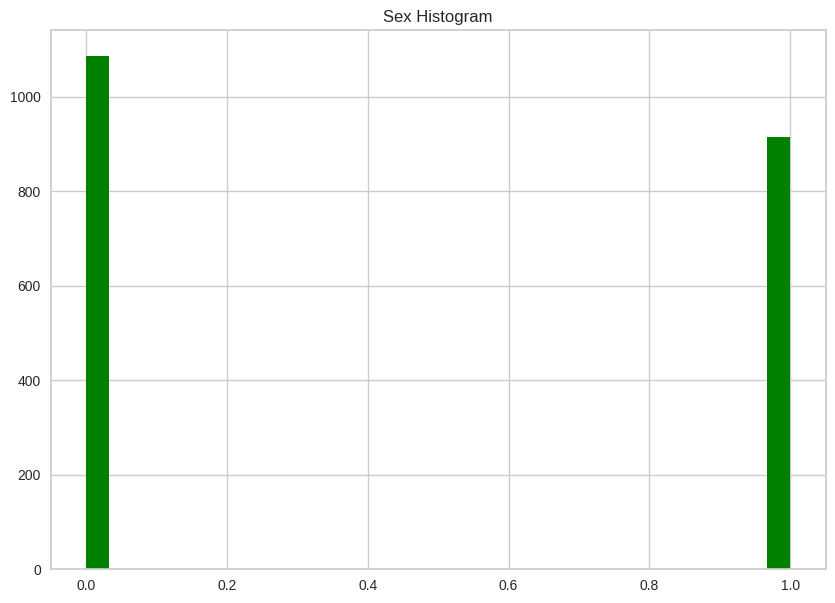

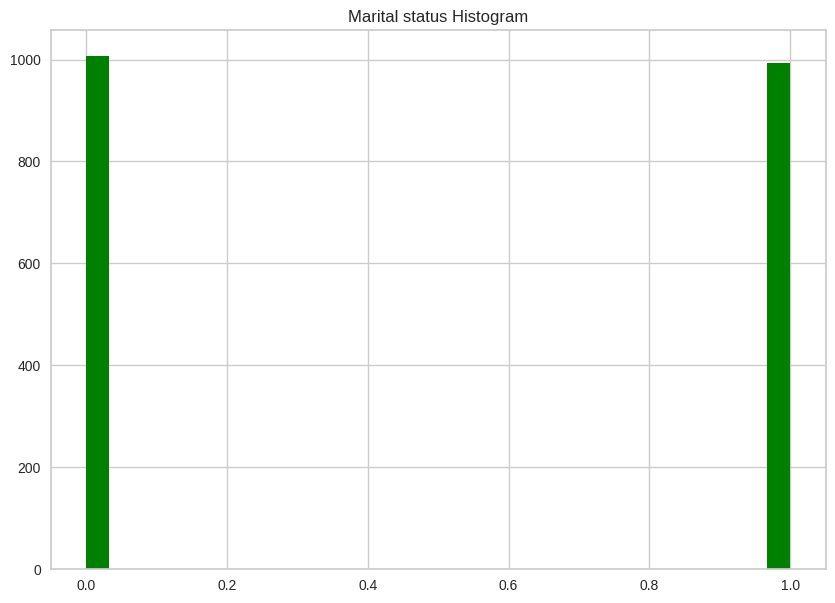

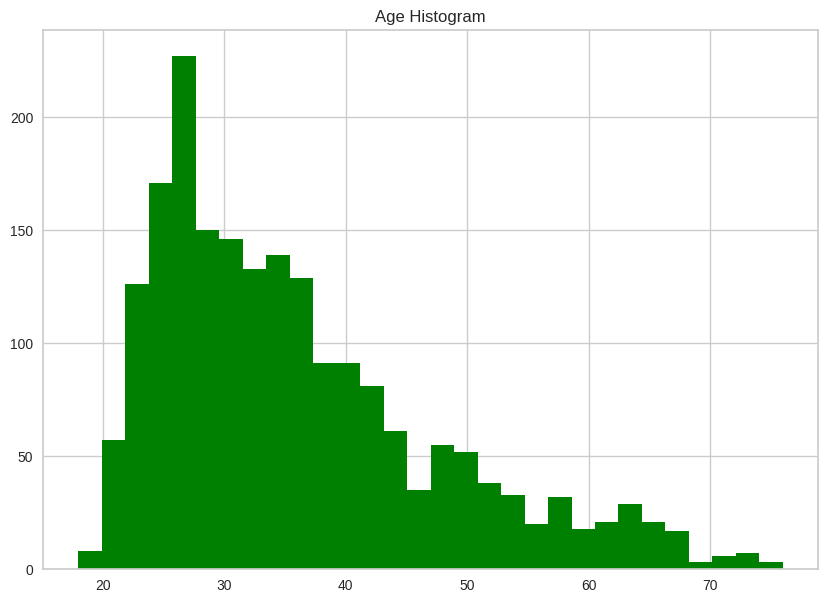

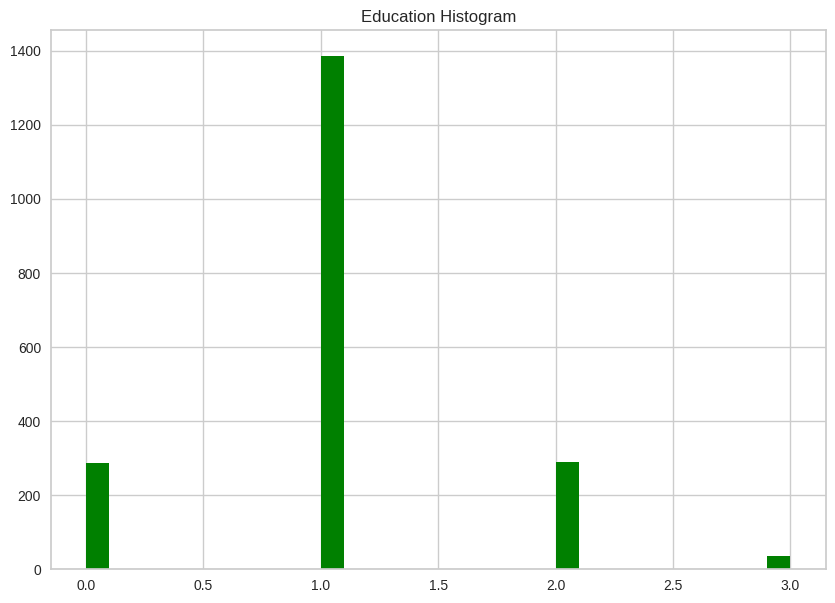

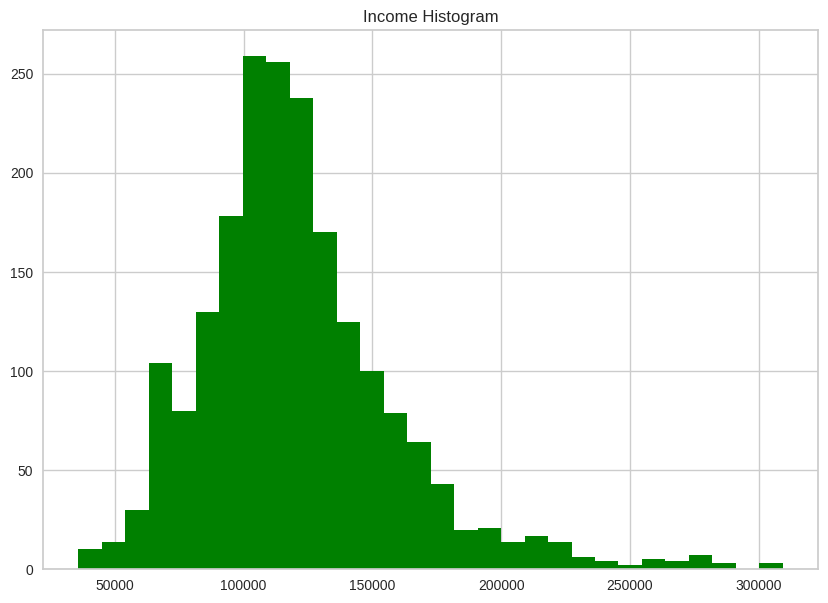

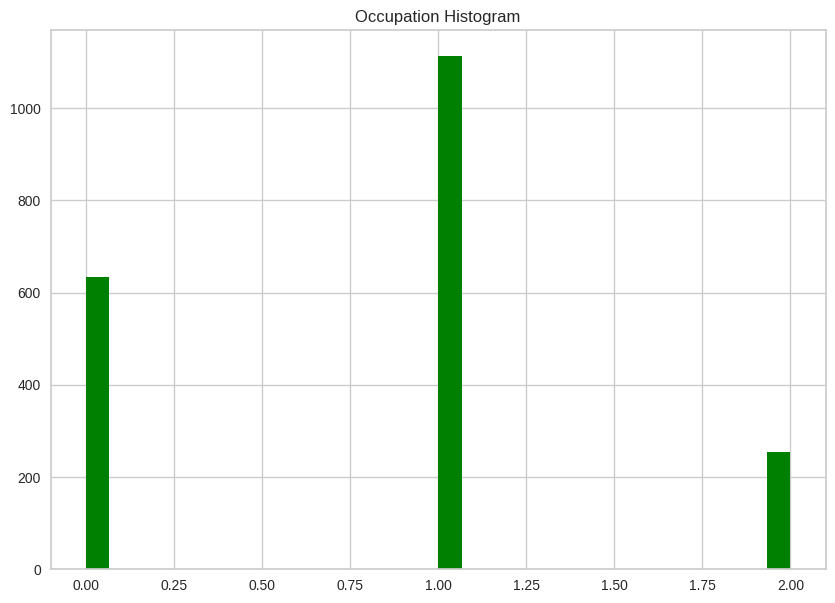

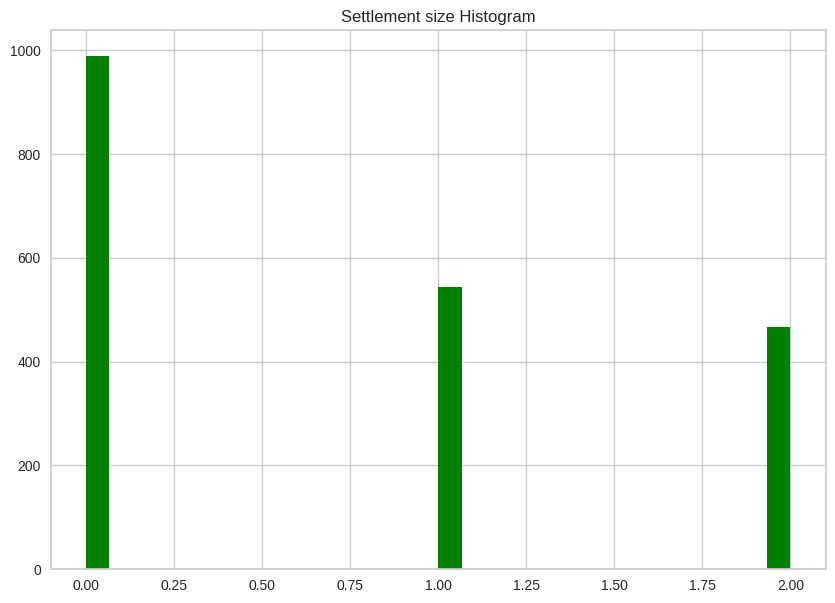

In [11]:
# Plotting the histogram for each feature 
for feature in (data):
    if feature in data.columns:
        plt.figure(figsize=(10,7))
        plt.hist(data[feature],bins=30,color="green")
        plt.title(f"{feature} Histogram")
        plt.show()
    else:
        print("Some Features Are Not In (df.columns)")
    

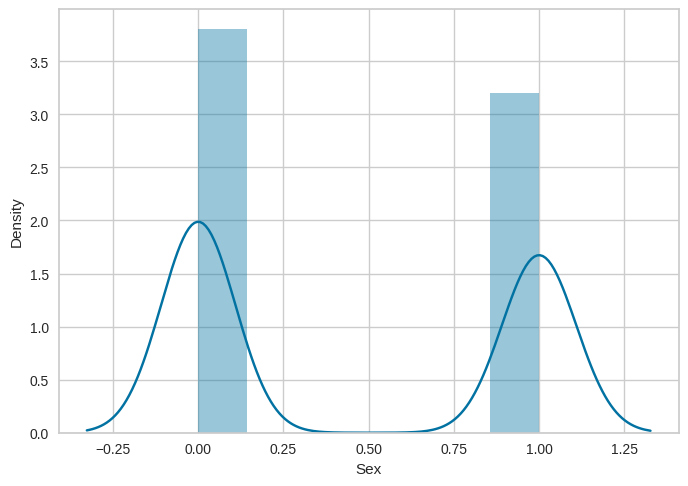

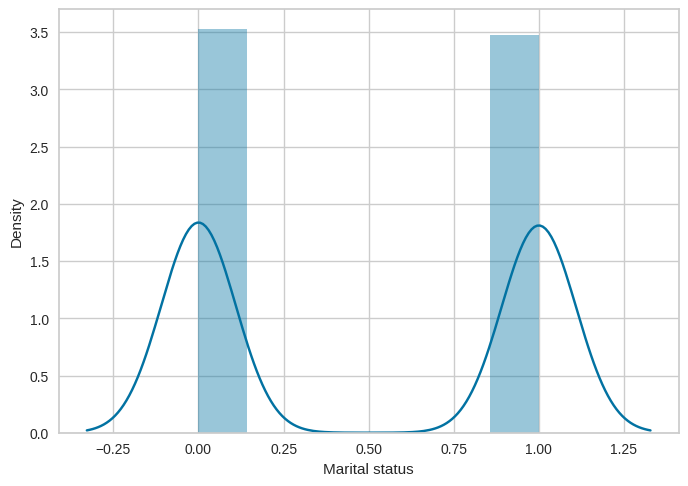

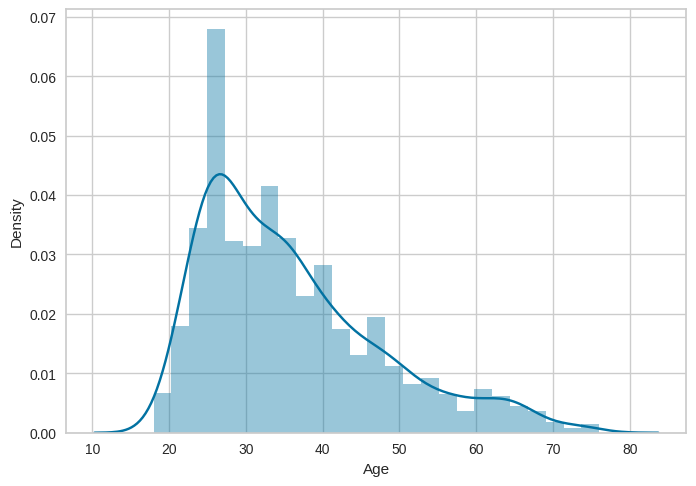

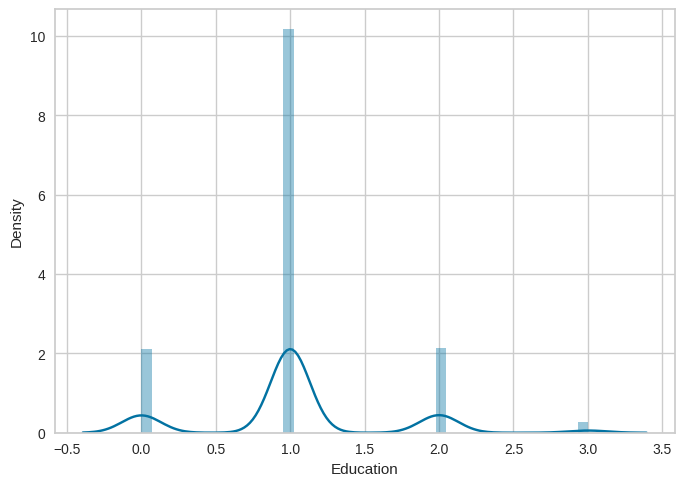

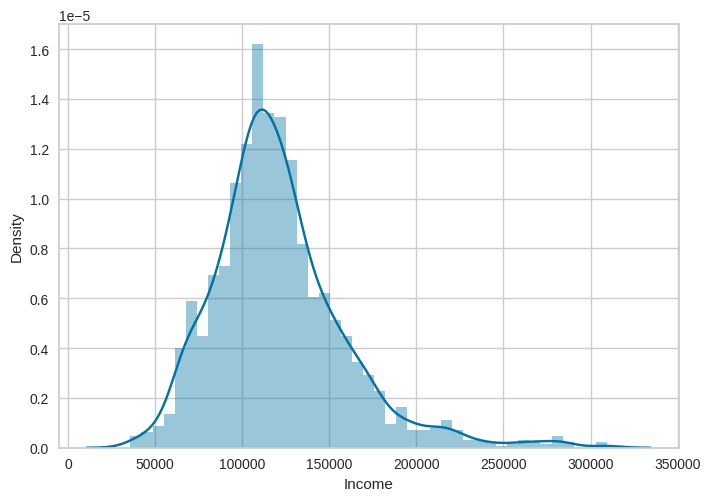

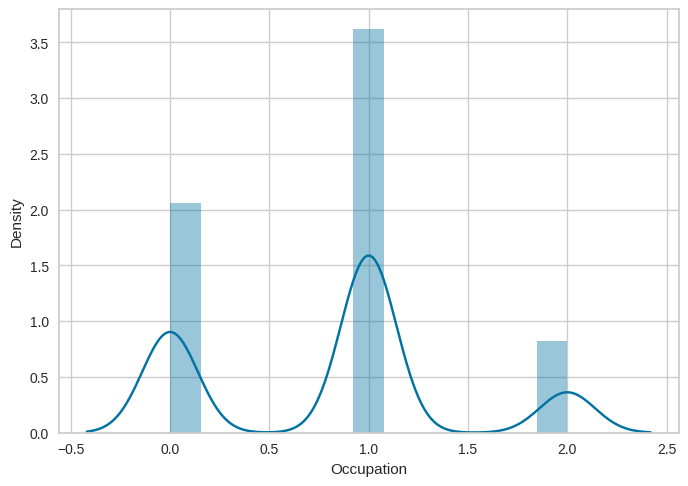

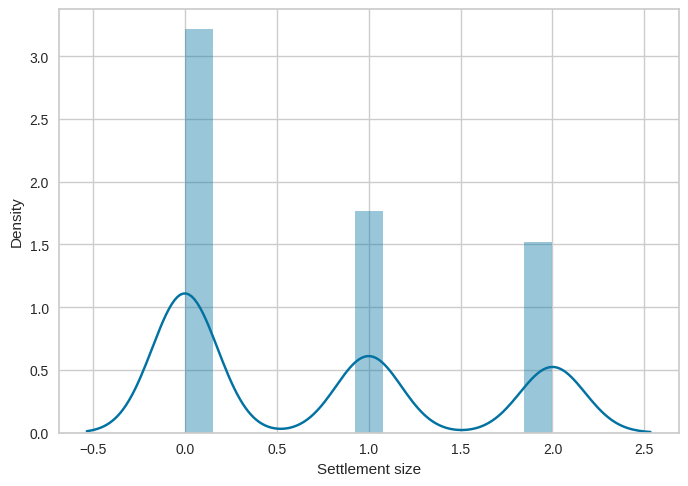

In [12]:
# Ploting the density plot for each feature in the dataset 

for i,feature in enumerate (data):
    plt.figure(i)
    sns.distplot(data[feature])
    plt.show()

# `MULTIVARIATE ANALYSIS`

In [13]:
# Returning the correlation between features  
corr = data.corr(method="spearman")
corr

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.227354,0.243693,-0.210155,-0.198652,-0.303118
Marital status,0.566511,1.000000,-0.270015,0.376785,-0.079645,-0.022700,-0.093684
Age,-0.227354,-0.270015,1.000000,0.585299,0.344604,0.099397,0.123912
Education,0.243693,0.376785,0.585299,1.000000,0.224328,0.050204,0.033585
Income,-0.210155,-0.079645,0.344604,0.224328,1.000000,0.687178,0.537210
Occupation,-0.198652,-0.022700,0.099397,0.050204,0.687178,1.000000,0.595971
Settlement size,-0.303118,-0.093684,0.123912,0.033585,0.537210,0.595971,1.000000


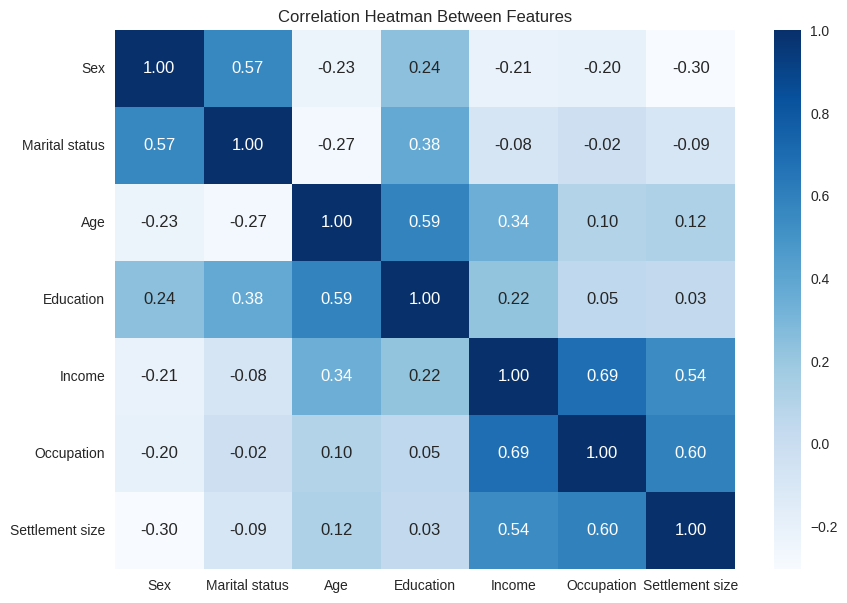

In [14]:
# Visualizing the results of the correlation using heatmap 
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="Blues")
plt.title("Correlation Heatman Between Features")
plt.show()

# `BIVARIATE ANALYSIS`

In [15]:
# Cross Tabulation
X = pd.crosstab(data["Marital status"],data["Age"])
X

Age,18,19,20,21,22,23,24,25,26,27,...,66,67,68,70,71,72,73,74,75,76
Marital status,,,,,,,,,,,,,,,,,,,,,
0,0,1,5,10,12,18,28,30,36,39,...,7,3,7,2,2,1,2,3,1,0
1,3,4,18,24,37,59,55,58,80,72,...,2,7,0,1,3,0,1,1,1,1


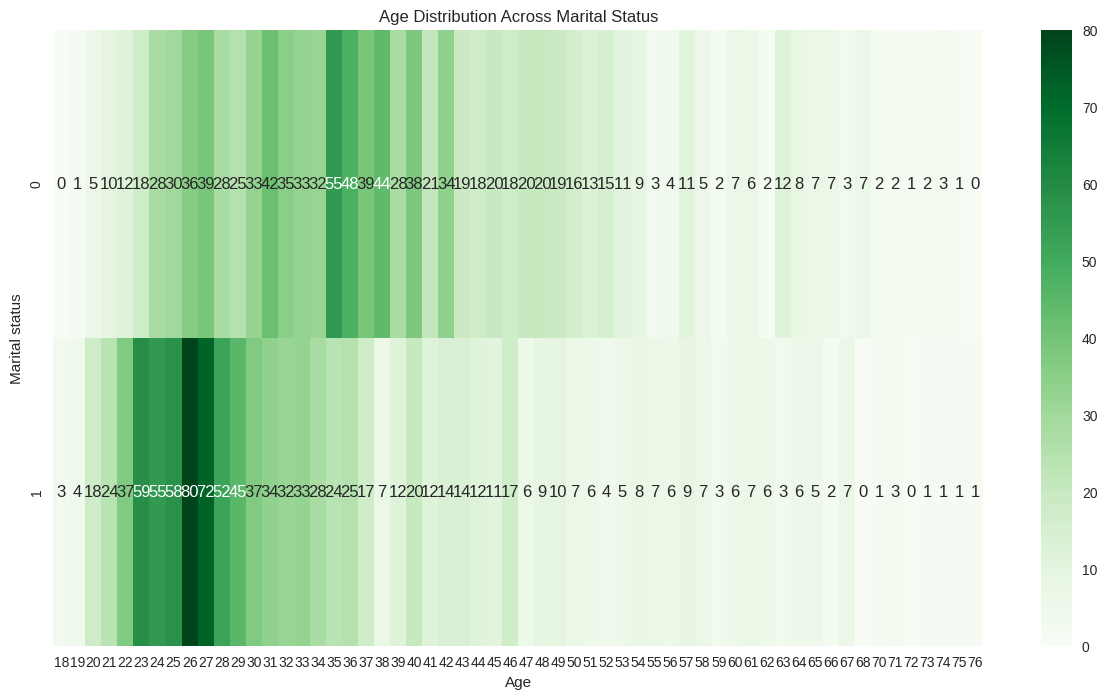

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(X,annot=True,fmt="d",cmap="Greens")
plt.title("Age Distribution Across Marital Status")
plt.show()

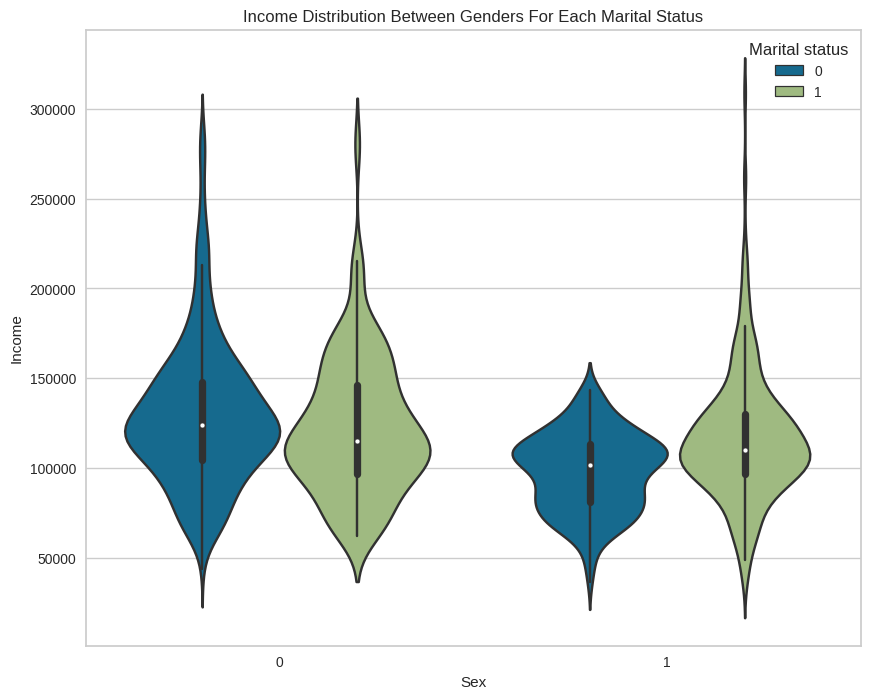

In [17]:
plt.figure(figsize=(10,8))
sns.violinplot(x=data["Sex"],y=data["Income"],hue="Marital status",data=data)
plt.title("Income Distribution Between Genders For Each Marital Status")
plt.show()

In [18]:
# UNSUPERVISED LEARNING 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [19]:
# Dimensionality Reduction (Principal Component Analysis)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 2.51474593,  0.83412239,  2.1748059 , ..., -0.67717594,
        -0.47205575, -0.19145715],
       [ 0.34493528,  0.59814564, -2.21160279, ..., -0.70626882,
         0.70363837,  0.25170287],
       [-0.65106267, -0.68009318,  2.2804186 , ...,  0.16648038,
         0.0494677 , -0.28672918],
       ...,
       [-1.45229829, -2.23593665,  0.89657125, ...,  0.19053628,
         0.34424927, -0.42087352],
       [-2.24145254,  0.62710847, -0.53045631, ...,  0.04852603,
         0.56274524,  0.15208905],
       [-1.86688505, -2.45467234,  0.66262172, ...,  0.22251297,
         0.08238039, -0.12614461]])

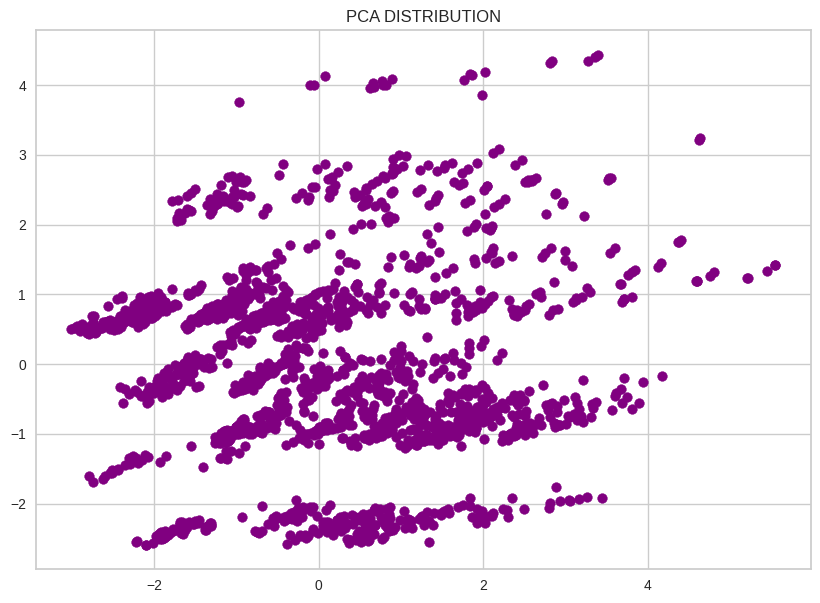

In [20]:
# Create two Pca features from Our X_pca
pca1 = [val[0] for val in X_pca]
pca2 = [val[1] for val in X_pca]

# Visualizing the distribution of the new feature dimension 
plt.figure(figsize=(10,7))
plt.scatter(pca1,pca2,color="purple")
plt.title("PCA DISTRIBUTION")
plt.show()

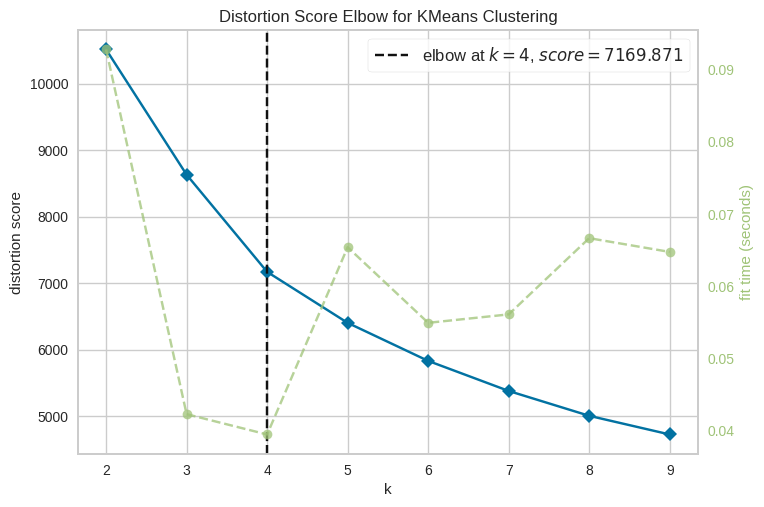

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Using Kelbow visualizer to know the amount of cluster groups to be created 

kmean = KMeans(random_state=42)
visual = KElbowVisualizer(kmean,k=(2,10))
visual.fit(X_pca)
visual.show()

In [22]:
# Now we are to create 4 cluster Groups from the chart above 
kmeans = KMeans(n_clusters=4,random_state=42)
preds= kmeans.fit_predict(X_pca)
preds

array([0, 2, 1, ..., 1, 2, 1], dtype=int32)

In [23]:
# Adding the two pca and the clusters group created to the dataframe 
data["PCA 1"]= pca1
data["Pca 2"]= pca2
data["Clusters"]= preds


# Checking for the number of cluster group(s)that was created  
data["Clusters"].value_counts()

Clusters
2    705
3    570
1    462
0    263
Name: count, dtype: int64

In [24]:
# Returning the new dataframe 
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PCA 1,Pca 2,Clusters
0,0,0,67,2,124670,1,2,2.514746,0.834122,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,3
...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,2


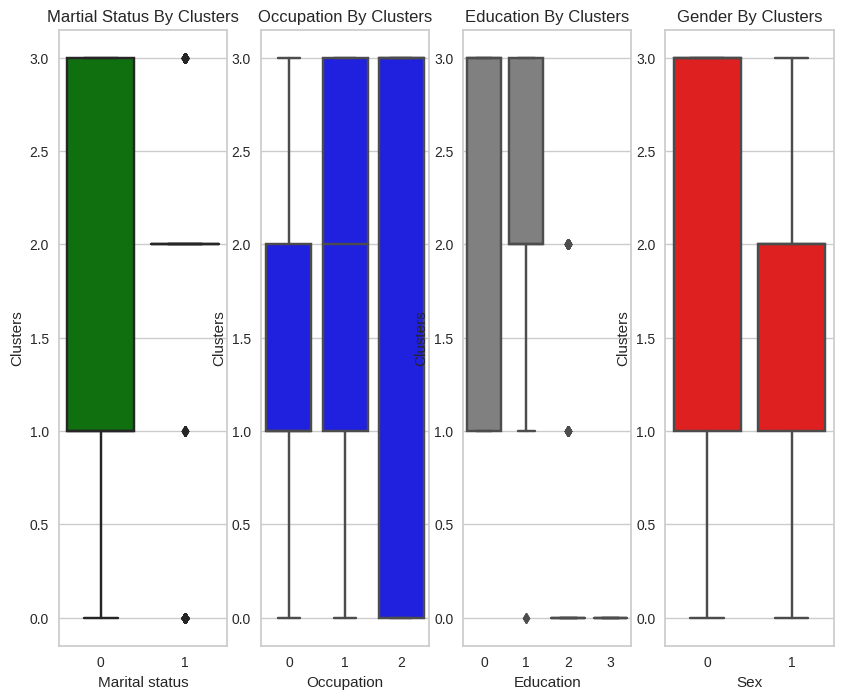

In [25]:
#Comparing various features with the Cluster groups 
plt.figure(figsize=(10,8))
plt.subplot(1,4,1)
sns.boxplot(x=data["Marital status"],y=data["Clusters"],color="green",data=data)
plt.title("Martial Status By Clusters")
plt.subplot(1,4,2)
sns.boxplot(x=data["Occupation"],y=data["Clusters"],color="blue",data=data)
plt.title("Occupation By Clusters")
plt.subplot(1,4,3)
sns.boxplot(x=data["Education"],y=data["Clusters"],color="grey",data=data)
plt.title("Education By Clusters")
plt.subplot(1,4,4)
sns.boxplot(x=data["Sex"],y=data["Clusters"],color="red",data=data)
plt.title("Gender By Clusters")
plt.show()

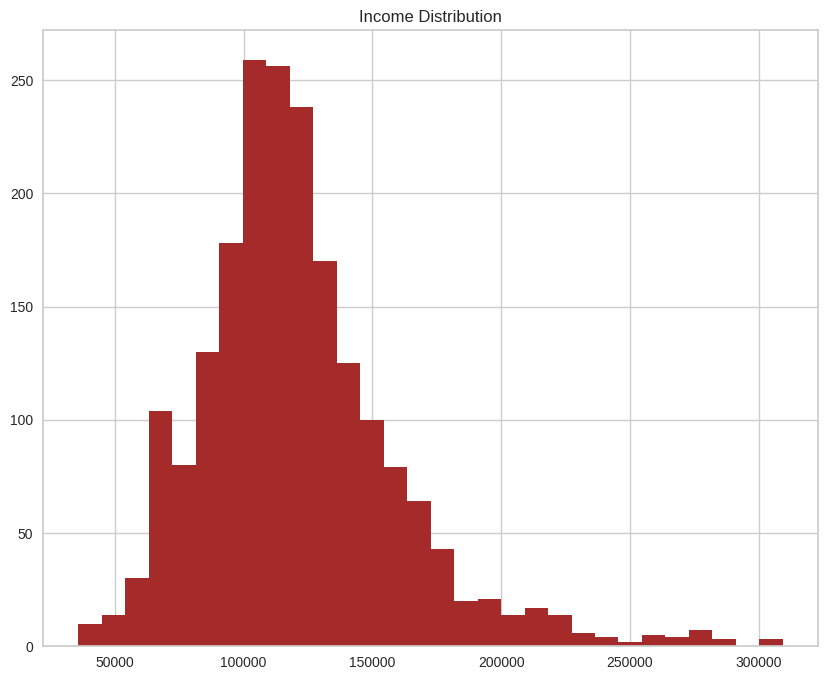

In [26]:
# Since the income values are too large to be visualized on the pie chart we can group the income of each customers 
# For better clarity on the range we can visualize using histogram 

plt.figure(figsize=(10,8))
plt.hist(data["Income"],bins=30,color="brown")
plt.title("Income Distribution")
plt.show()

In [27]:
# Now we can create the income range from the values in the X_axis
bins = [0,50000,200000,350000]
label = ["Low","Medium","High"]

data["Income Range"]= pd.cut(data["Income"],bins=bins,labels=label,include_lowest=True)
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,PCA 1,Pca 2,Clusters,Income Range
0,0,0,67,2,124670,1,2,2.514746,0.834122,0,Medium
1,1,1,22,1,150773,1,2,0.344935,0.598146,2,Medium
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,1,Medium
3,0,0,45,1,171565,1,1,1.714316,-0.579927,3,Medium
4,0,0,53,1,149031,1,1,1.626745,-0.440496,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1,Medium
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,2,Medium
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,1,Medium
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,2,Medium


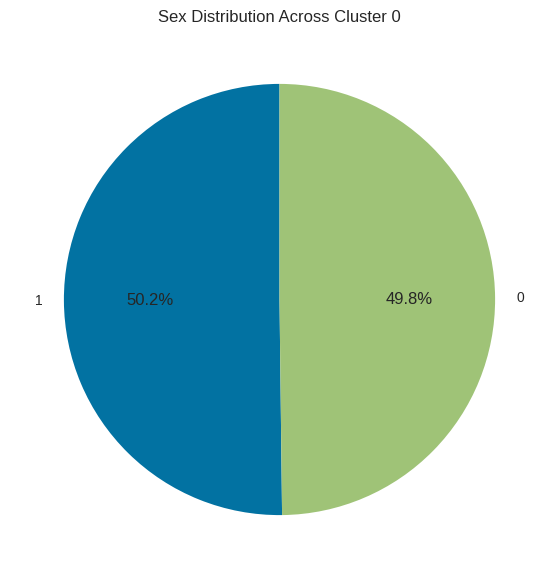

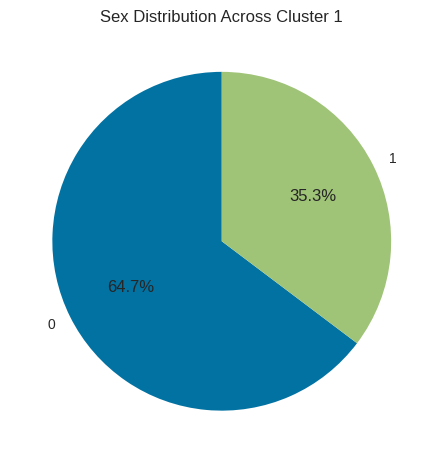

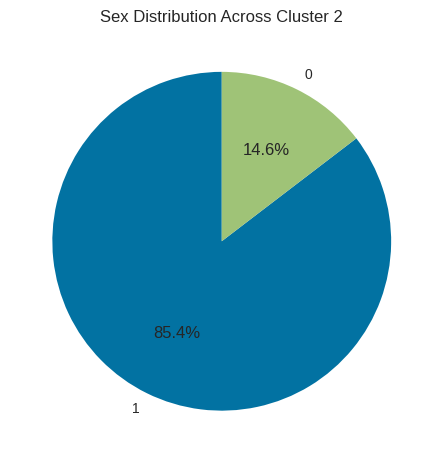

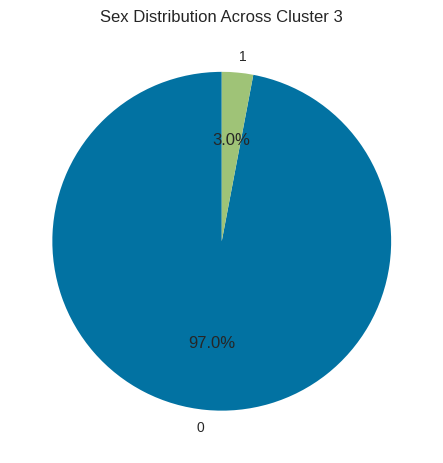

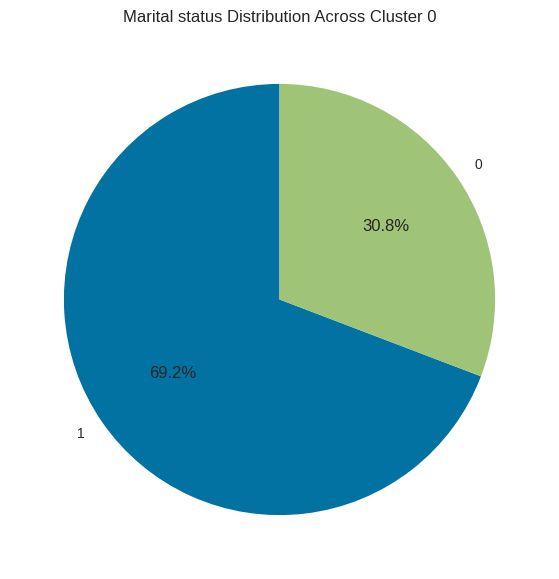

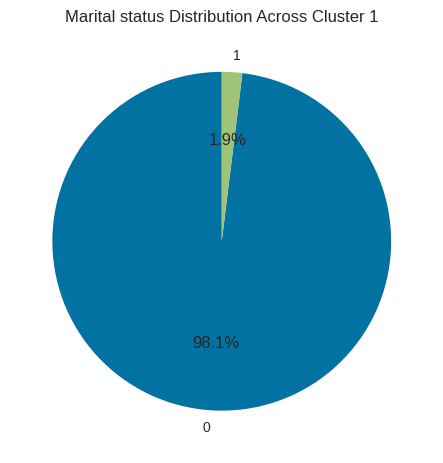

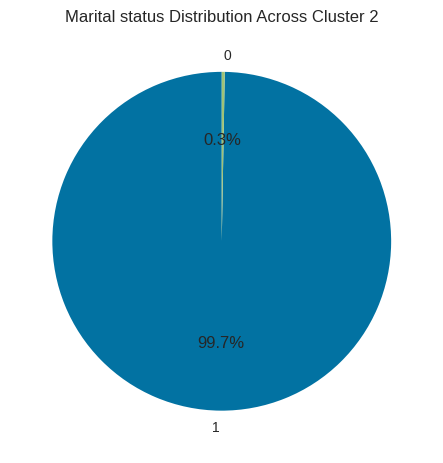

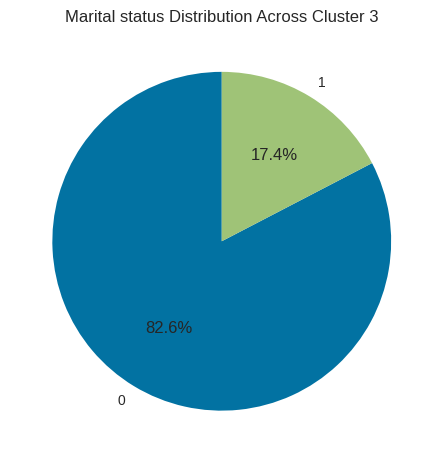

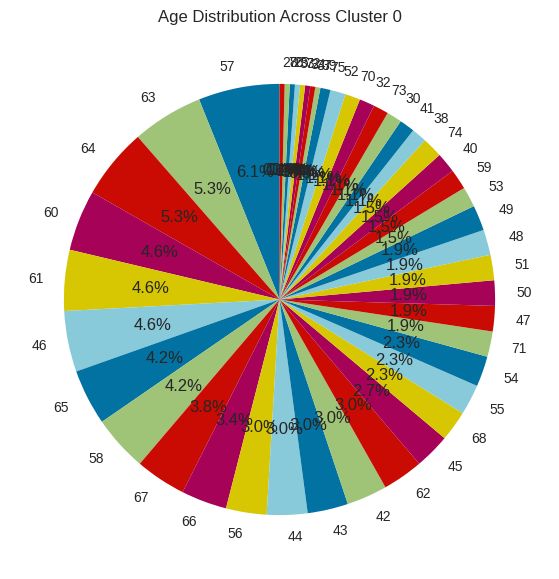

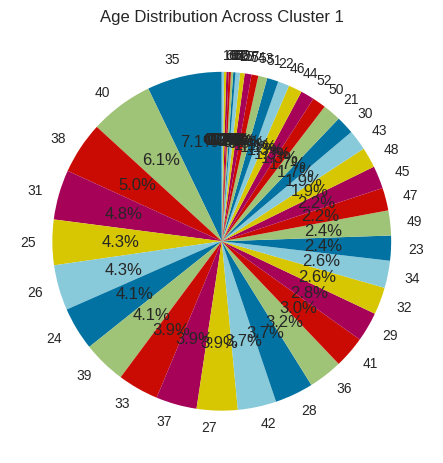

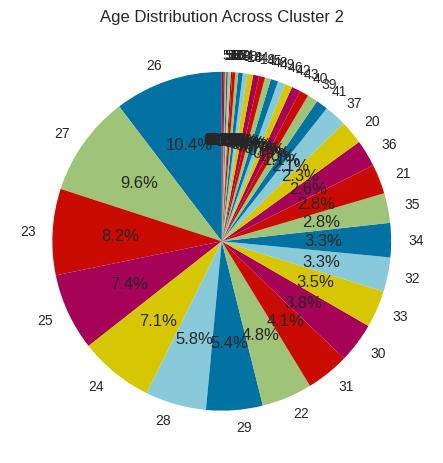

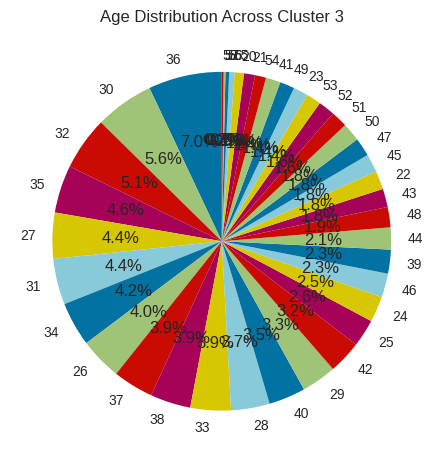

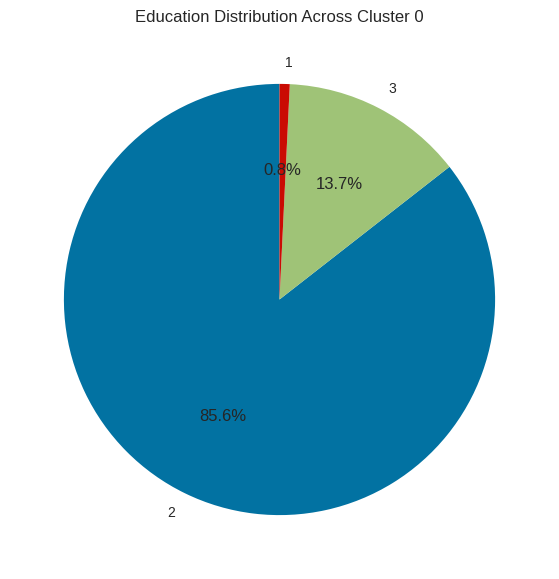

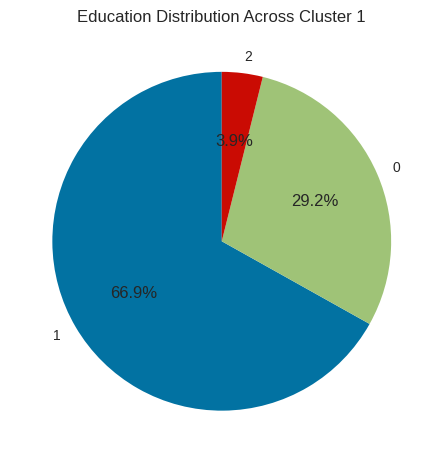

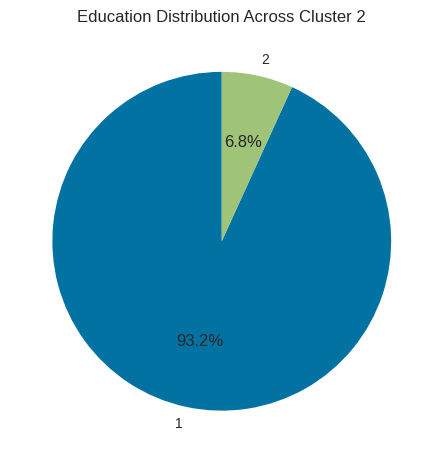

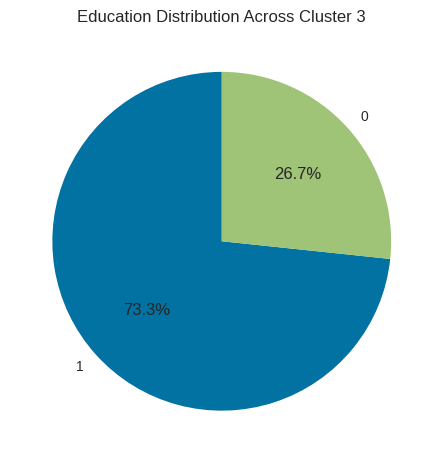

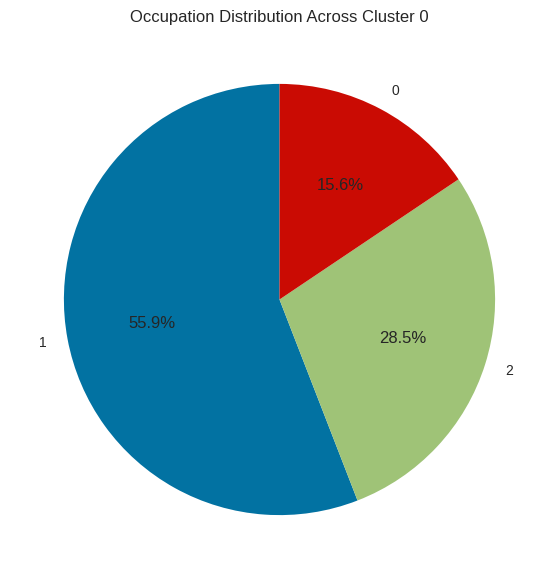

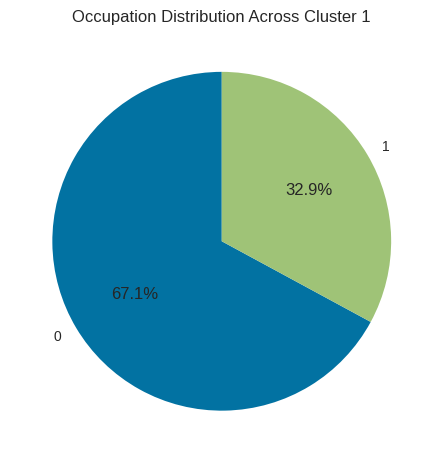

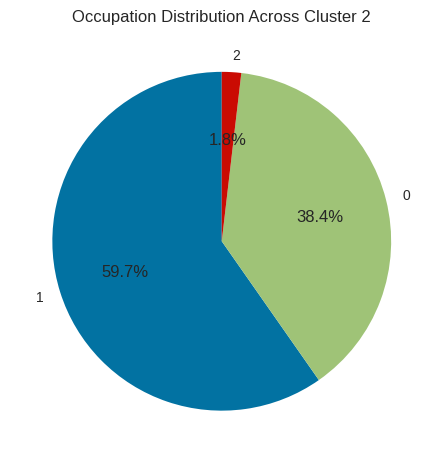

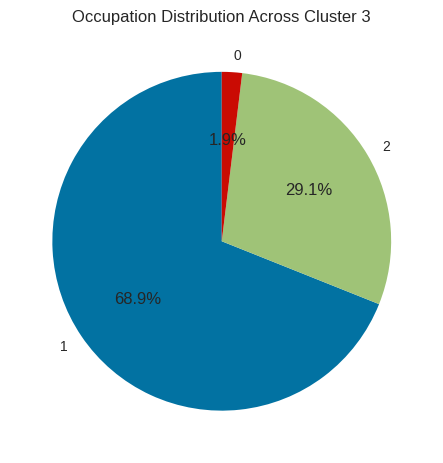

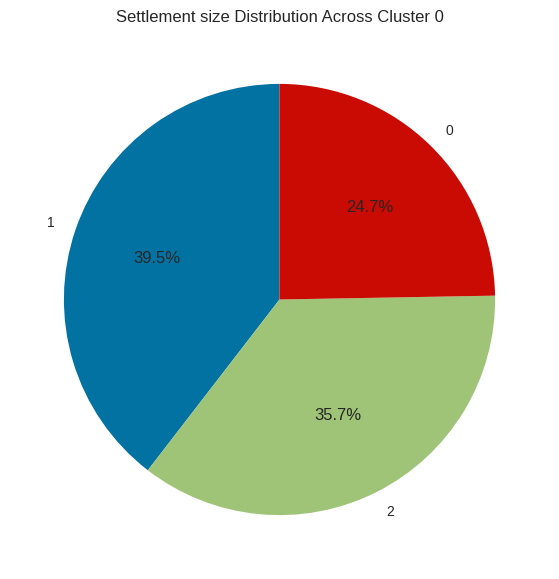

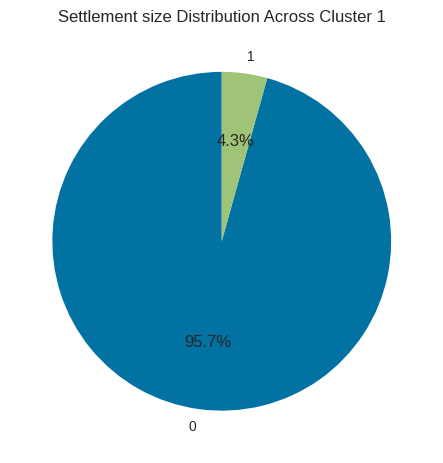

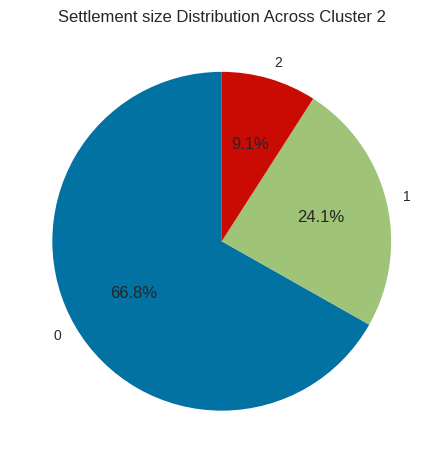

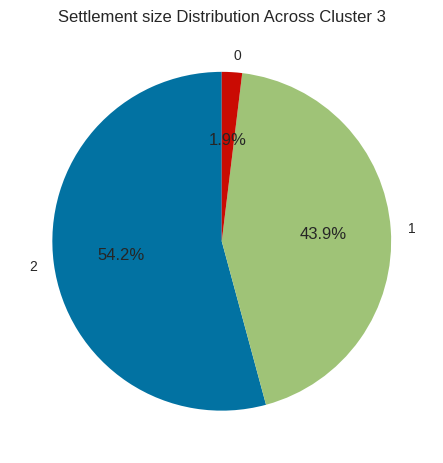

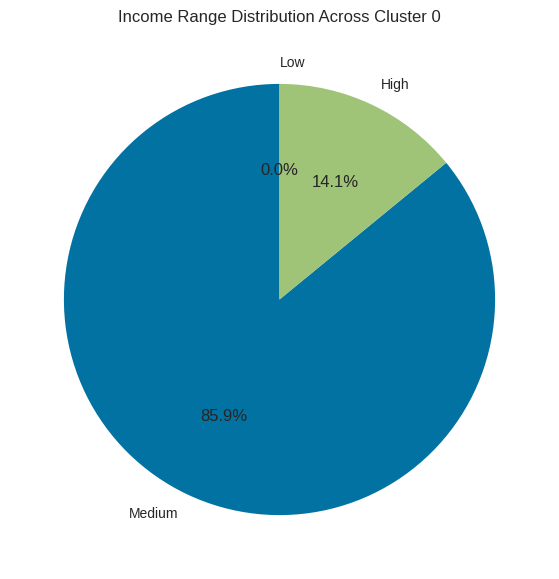

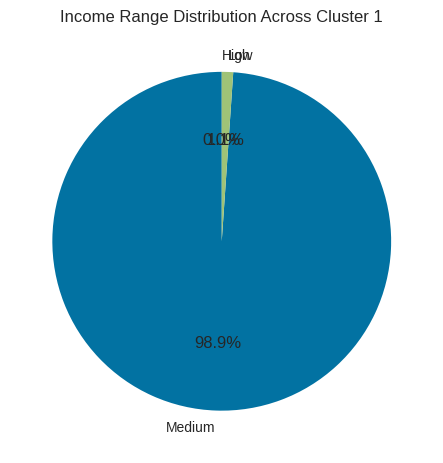

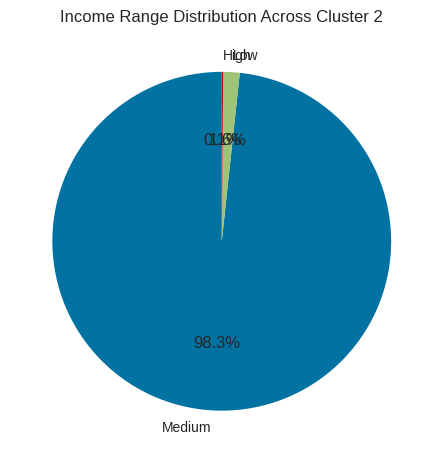

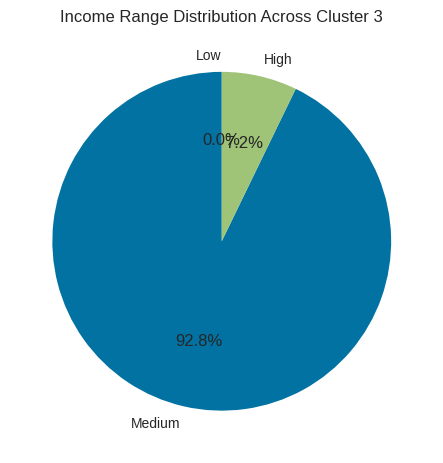

In [28]:
# Hences we can cut out the initial Income feature
X = data.drop(["PCA 1","Pca 2","Income"],axis=1)

# We can compare features by clusters using pie chart to give more clarity 

for feature in X.columns:
    if feature != "Clusters":
        plt.figure(figsize=(9,7))
        for i in range (4): # Giving that we have 4 clusters (0,1,2,3)
            cluster_divs = X[X["Clusters"]==i][feature]
            plt.pie(cluster_divs.value_counts(),labels = cluster_divs.value_counts().index,autopct="%1.1f%%",startangle=90)
            plt.title(f"{feature} Distribution Across Cluster {i}")
            plt.show()

# ~THE END~